# Network model of epidemic

The reported study was funded by RFBR and CNPq, FASIE, DBT, DST, MOST, NSFC, SAMRC  according to the research project No 20-51-80002

In [1]:
import networkx as nx
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
POPULATION   = 20
p_exposed    = int(POPULATION * 0.1)
p_infectious = int(POPULATION * 0.05)
p_removed    = 0
T = 20
END_OF_TIMES = 1000000

infectious_lambda = 1/0.186 # распределение вейбула αˆ= and λˆ=
infectious_alpha = 1.24

removed_lambda = 16.5 # mean = 14.46 
removed_alpha = 2.5   # sd = 6

death_rate = 0.03
infectious_rate = 0.0258

POPULATION, p_exposed, p_infectious, p_removed

(20, 2, 1, 0)

In [3]:
G = nx.watts_strogatz_graph(POPULATION, 4, 0.2)

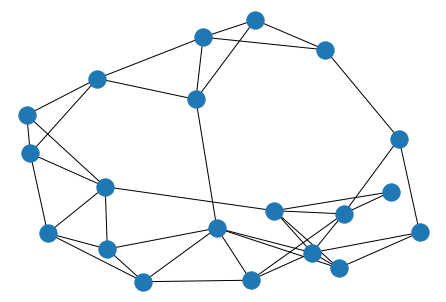

In [4]:
nx.draw(G)

In [5]:
nx.adjacency_matrix(G)
A = nx.adjacency_matrix(G)

In [6]:
AM = torch.tensor(A.todense())

In [24]:
state = torch.zeros(POPULATION)

In [25]:
# 0 - S: The susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.
# 1 - E: Exposed. For many important infections, there is a significant incubation period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed).
# 2 - I: The infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.
# 3 - R: The removed (and immune) or deceased individuals

In [26]:
state[0:p_exposed] = 1

In [27]:
state[p_exposed:p_exposed+p_infectious]=2

In [28]:
state = state[torch.randperm(state.nelement())]

In [29]:
tau = torch.full([POPULATION], END_OF_TIMES)

In [30]:
ei_distr = torch.distributions.Weibull(torch.tensor([infectious_lambda]), torch.tensor([infectious_alpha]))
ir_distr = torch.distributions.Weibull(torch.tensor([removed_lambda]), torch.tensor([removed_alpha]))

In [31]:
for t in range(T):
    print(t)
    idx = (state == 1) & (tau == END_OF_TIMES)
    tau[idx] = torch.reshape(ei_distr.sample(tau[idx].size()).long(),(-1,)) + t

    idx = (state == 2) & (tau == END_OF_TIMES)
    tau[idx] = torch.reshape(ir_distr.sample(tau[idx].size()).long(),(-1,)) + t
    print(tau)
    
    # Susceptible -> Exposed
    # AM * state[state == 1]
    
    # Exposed -> Infectious
    idx = (state == 1) & (tau == t)
    state[idx] = 2
    tau[idx] = END_OF_TIMES

    # Infectious -> Removed
    idx = (state == 2) & (tau == t)
    state[idx] = 3
    tau[idx] = END_OF_TIMES
    print(state)
    
    

0
tensor([1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       4, 1000000,
        1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       3, 1000000,
        1000000,      29, 1000000, 1000000])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
        0., 0.])
1
tensor([1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       4, 1000000,
        1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       3, 1000000,
        1000000,      29, 1000000, 1000000])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
        0., 0.])
2
tensor([1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       4, 1000000,
        1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       3, 1000000,
        1000000,      29, 1000000, 1000000])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
        0., 0.])
3
tensor([1000000, 1000000, 1000000, 1000000, 1000000, 1000000,       4, 1000000,
      